In [16]:
from sklearn.ensemble import BaggingClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
iris=datasets.load_iris()
X=iris.data
y=iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

In [4]:
len(X_test)

45

### 貝式定理
https://ithelp.ithome.com.tw/articles/10205582?sc=iThelpR
https://mropengate.blogspot.com/2015/06/ai-ch14-3-naive-bayes-classifier.html
https://fu-sheng-wang.blogspot.com/2017/03/ai231-naive-bayes-classifier.html

In [5]:
from sklearn import tree
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

In [14]:
clf= [ tree.DecisionTreeClassifier(), svm.LinearSVC(), GaussianNB() ]

In [27]:
for i in clf:
    bagging=BaggingClassifier(base_estimator=i,n_estimators=10,
                          bootstrap=True,bootstrap_features=True,max_features=3,max_samples=0.7)
    bagging.fit(X_train,y_train)
#     bagging.predict(X_test)
    print(i)
    print(bagging.score(X_train,y_train))
    print(bagging.score(X_test,y_test))

DecisionTreeClassifier()
0.9809523809523809
0.9555555555555556
LinearSVC()
0.9619047619047619
0.9333333333333333
GaussianNB()
0.9523809523809523
0.9777777777777777


In [19]:
bagging=BaggingClassifier(base_estimator=clf[0],n_estimators=10,
                          bootstrap=True,bootstrap_features=True,max_features=3,max_samples=0.7)

In [20]:
bagging.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                  bootstrap_features=True, max_features=3, max_samples=0.7)

In [21]:
bagging.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [22]:
bagging.score(X_train,y_train)

0.9809523809523809

In [23]:
bagging.score(X_test,y_test)

0.9777777777777777

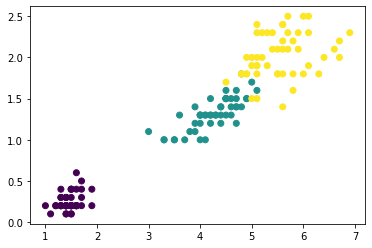

In [24]:
plt.scatter(X[:,2],X[:,3],c=y)

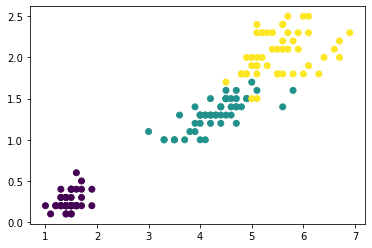

In [25]:
plt.scatter(X[:,2],X[:,3],c=bagging.predict(X))